# Uber Basic Data Analysis using Python

This notebook contains a basic analysis through some visualizations of the Uber Pickups in New York City data set.

The analysis is broken up into 2 sections:
- Data Loading and Preparation.
- Exploration and visualization of pickups from April to September 2014.

The dataset can be found on https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/uber-trip-data.

## 1. Data Loading and Preparation

### 1.1 Loading Modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1.2 Loading Data

In [0]:
#Load the datasets

df_apr14=pd.read_csv("data/uber-raw-data-apr14.csv")
df_may14=pd.read_csv("data/uber-raw-data-may14.csv")
df_jun14=pd.read_csv("data/uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("data/uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("data/uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("data/uber-raw-data-sep14.csv")

#Merge the dataframes into one

df = df_apr14.append([df_may14,df_jun14,df_jul14,df_aug14,df_sep14], ignore_index=True)

### 1.3 Data Preparation

In [0]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [0]:
#Renaming the Date/Time Colomn
df = df.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

#Adding usufull colomns
df['Month'] = df['Date_time'].dt.month_name()
df['weekday'] = df['Date_time'].dt.weekday_name
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [0]:
df

,Date_time,Lat,Lon,Base,Month,weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33
...,...,...,...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,September,Tuesday,30,22,57
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,September,Tuesday,30,22,57
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,September,Tuesday,30,22,58
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,September,Tuesday,30,22,58


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
Date_time    datetime64[ns]
Lat          float64
Lon          float64
Base         object
Month        object
weekday      object
Day          int64
Hour         int64
Minute       int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 311.3+ MB


In [0]:
df.describe(include = 'all')

,Date_time,Lat,Lon,Base,Month,weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,260093,NaN,NaN,5,6,7,NaN,NaN,NaN
top,2014-04-07 20:21:00,NaN,NaN,B02617,September,Thursday,NaN,NaN,NaN
freq,97,NaN,NaN,1458853,1028136,755145,NaN,NaN,NaN
first,2014-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-09-30 22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
std,NaN,3.994991e-02,5.726670e-02,NaN,NaN,NaN,8.744902e+00,5.958759e+00,1.732238e+01
min,NaN,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01


## 2 Exploration and Visualization

Through our exploration we are going to explore and visualize:
- The number of trips by hour
- The number of trips by month
- The number of trips by hour and month
- The number of trips by weekday
- The number of trips by weekday and month
- The number of trips by day


- When is the number of trips the highest (for each one of the analysis above)

### 2.1 Trips by hour

In [0]:
#Grouping by Hour 
df_hour_grouped = df.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 

df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


In [0]:
#The highest number of trips by hour
max(df_hour['Number_of_trips'])

336190

In [0]:
#The Hour where the number of trips is the highest
df_hour[df_hour['Number_of_trips'] == 336190].index[0]

17

#### Plotting the results

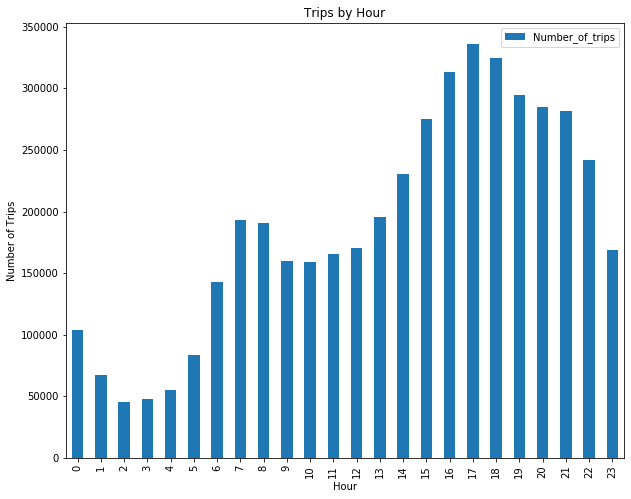

In [0]:
df_hour.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

We observe that the number of trips are higher around 17:00 and 18:00.

### 2.2 Trips by month

In [0]:
#Grouping by Month 
df_month_grouped = df.groupby(['Month'], sort=False).count()

#Creating the sub dataframe
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index) 

df_month

,Number_of_trips
Month,
April,564516
May,652435
June,663844
July,796121
August,829275
September,1028136


#### Plotting the results

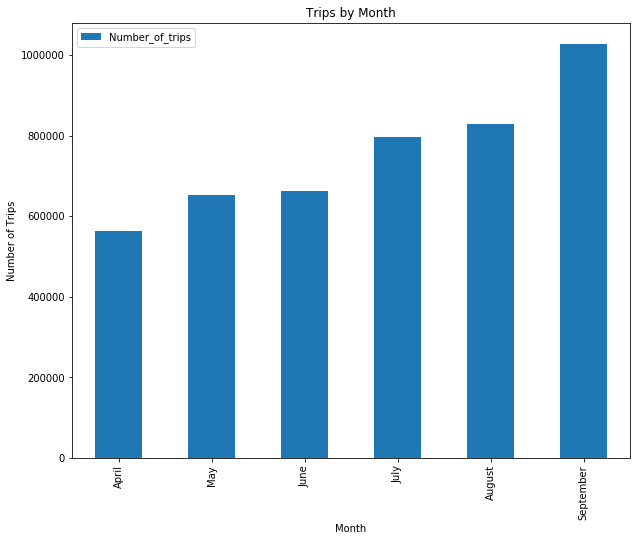

In [0]:
df_month.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

### 2.3 Trips by hour and month

In [0]:
#Grouping by Hour and Month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#Creating the grouped DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index) 

df_hour_month.head(10)

Number_of_trips
Hour Month                     
0    April                11910
     August               21451
     July                 17953
     June                 14514
     May                  13875
     September            24133
1    April                 7769
     August               14471
     July                 11527
     June                  9167

In [0]:
#Reseting the Index
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,11910
1,0,August,21451
2,0,July,17953
3,0,June,14514
4,0,May,13875


In [0]:
#Preparing the Number of trips data
#We create a Numpy array that includes the Number of trips data then reshape it to fit our 
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [0]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

,April,May,June,July,August,September
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675


#### Plotting the results

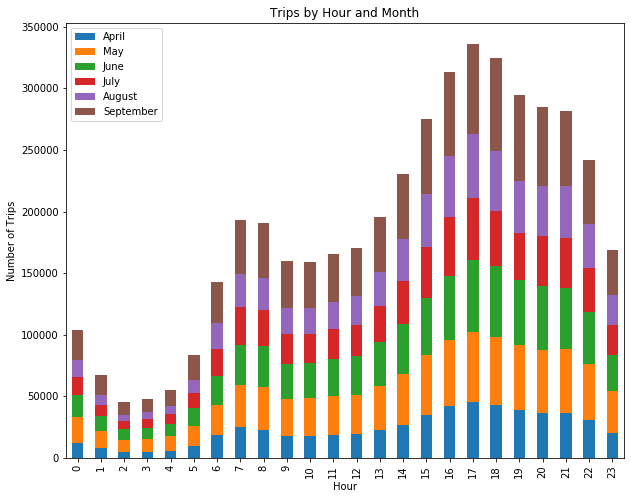

In [0]:
df_hour_month.plot(kind='bar', figsize=(10,8), stacked=True)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

### 2.4 Trips by weekday

In [0]:
#Grouping by Weekday
df_weekday_grouped = df.groupby(['weekday']).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 

df_weekday.head()

,Number_of_trips
weekday,
Friday,741139
Monday,541472
Saturday,646114
Sunday,490180
Thursday,755145


#### Plotting the results

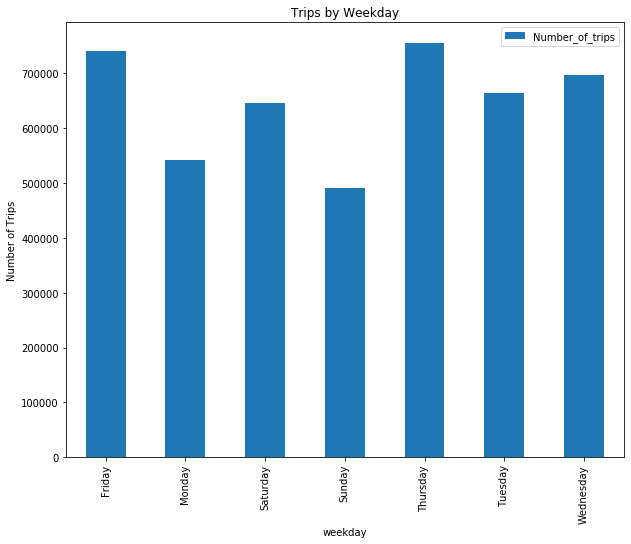

In [0]:
df_weekday.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

### 2.5 Trips by weekday and month


In [0]:
#Grouping by Weekday and Month
df_month_weekday_grouped = df.groupby(['Month','weekday'], sort=False).count()

#Creating the grouped DataFrame
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index) 

df_month_weekday.head(10)

Number_of_trips
Month weekday                   
April Tuesday              91185
      Wednesday           108631
      Thursday             85067
      Friday               90303
      Saturday             77218
      Sunday               51251
      Monday               60861
May   Thursday            128921
      Friday              133991
      Saturday            102990

In [0]:
#Reseting the Index
df_month_weekday.reset_index(inplace= True)

#Preparing the Number of trips 
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)

df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns = df['weekday'].unique())
df_month_weekday.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
April,91185,108631,85067,90303,77218,51251,60861
May,128921,133991,102990,56168,63846,76662,89857
June,79656,94655,88134,99654,115325,105056,81364
July,137454,147717,148439,102735,90260,76327,93189
August,148674,132225,110246,91633,107124,115256,124117


#### Plotting the results

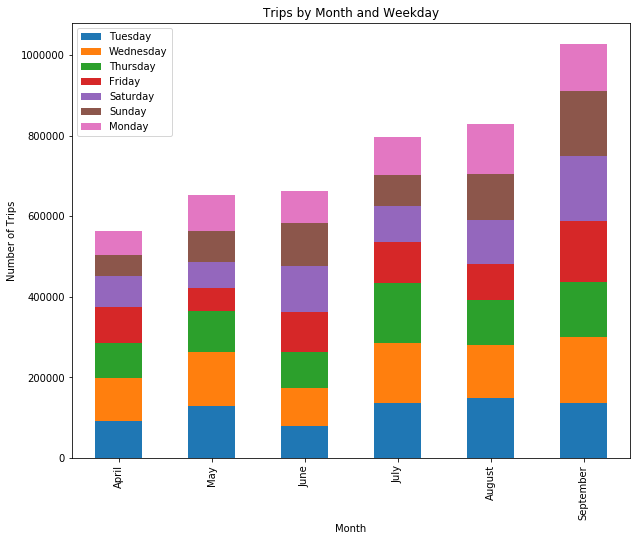

In [0]:
df_month_weekday.plot(kind='bar', figsize=(10,8), stacked = True)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

### 2.6 Trips by day

In [0]:
#Grouping by Day
df_day_grouped = df.groupby(['Day']).count()

#Creating the grouped DataFrame
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index) 

df_day.head()

,Number_of_trips
Day,
1,127430
2,143201
3,142983
4,140923
5,147054


#### Plotting the results

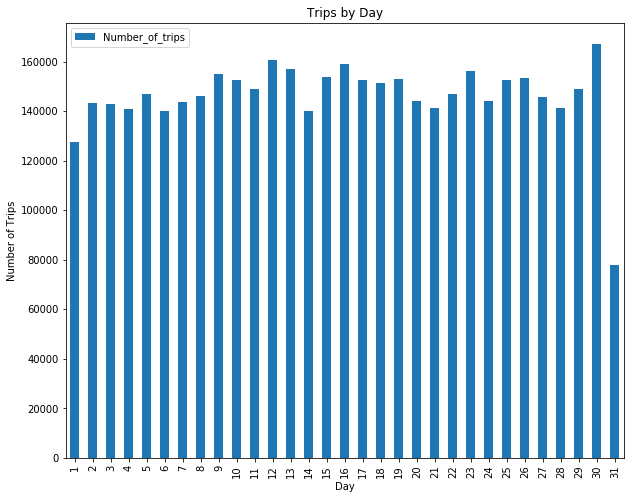

In [0]:
df_day.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Day')

plt.show()